In [51]:
#importing import libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [52]:
#importing data
df = pd.read_csv(r"C:\Users\megal\Downloads\archive (1)\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
#checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
'''
Conclusion ->
all the column are in appropiate datatype and there is no null values
'''

''

In [55]:
#getting the proporation of values
df['Species'].value_counts(normalize=True) * 100

Species
Iris-setosa        33.333333
Iris-versicolor    33.333333
Iris-virginica     33.333333
Name: proportion, dtype: float64

In [ ]:
'''
All three classes have an equal number of data points.
'''

In [56]:
#seperating input and output variable
x = df.drop('Species',axis = 1)
y = df['Species']

In [57]:
#Normalizing input features
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [58]:
#seperating train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=5)

# KNeighborsClassifier

In [60]:
#creating KNeighborsClassifier 
knn = KNeighborsClassifier()

#fitting the model
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [61]:
#taking prediction from model
y_pred = knn.predict(x_test)
y_train_pred = knn.predict(x_train)

In [62]:
#model evaluation on training data
print('Training Confusion metrics :\n',metrics.confusion_matrix(y_train,y_train_pred))
print('\nTraining Accuracy :\n',np.round(metrics.accuracy_score(y_train,y_train_pred),2))


#model evaluation on testing data
print('\nTesting Confusion Metris :\n',metrics.confusion_matrix(y_test,y_pred))
print('\nTesting Accuracy :\n',np.round(metrics.accuracy_score(y_test,y_pred),2))


Training Confusion metrics :
 [[42  0  0]
 [ 0 39  0]
 [ 0  1 38]]

Training Accuracy :
 0.99

Testing Confusion Metris :
 [[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]

Testing Accuracy :
 1.0


In [ ]:
'''
the model achieving a training accuracy of 99% and a perfect testing accuracy of 100%. 
The confusion matrices indicate that the model correctly classified all classes, with very small misclassifications.
'''

''

In [70]:
#Finding the optimal value of K
#List of values of k
k_range = range(1,15)
#Accuracy for different K values
print("\nAccuracy for different K values")
for k in k_range:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(x_train, y_train)
    y_pred_k = knn_k.predict(x_test)
    y_train_pred_k = knn_k.predict(x_train)
    print('k=',k,'Training Accuracy :',np.round(metrics.accuracy_score(y_train,y_train_pred)))
    print('K=',k,'Testing Accuracy :',np.round(metrics.accuracy_score(y_test,y_pred),2),'\n')


Accuracy for different K values
k= 1 Training Accuracy : 1.0
K= 1 Testing Accuracy : 1.0 

k= 2 Training Accuracy : 1.0
K= 2 Testing Accuracy : 1.0 

k= 3 Training Accuracy : 1.0
K= 3 Testing Accuracy : 1.0 

k= 4 Training Accuracy : 1.0
K= 4 Testing Accuracy : 1.0 

k= 5 Training Accuracy : 1.0
K= 5 Testing Accuracy : 1.0 

k= 6 Training Accuracy : 1.0
K= 6 Testing Accuracy : 1.0 

k= 7 Training Accuracy : 1.0
K= 7 Testing Accuracy : 1.0 

k= 8 Training Accuracy : 1.0
K= 8 Testing Accuracy : 1.0 

k= 9 Training Accuracy : 1.0
K= 9 Testing Accuracy : 1.0 

k= 10 Training Accuracy : 1.0
K= 10 Testing Accuracy : 1.0 

k= 11 Training Accuracy : 1.0
K= 11 Testing Accuracy : 1.0 

k= 12 Training Accuracy : 1.0
K= 12 Testing Accuracy : 1.0 

k= 13 Training Accuracy : 1.0
K= 13 Testing Accuracy : 1.0 

k= 14 Training Accuracy : 1.0
K= 14 Testing Accuracy : 1.0 



In [ ]:
'''
For all k values, I obtained a training and testing accuracy of 1.
'''

In [71]:
# using only first two features for visualization
x_vis = df[['SepalLengthCm', 'SepalWidthCm']]
y_vis = df['Species']

In [72]:
# normalizing feature input
x_vis_scaled = scaler.fit_transform(x_vis)

In [73]:
# performing train test split
x_vis_train, x_vis_test, y_vis_train, y_vis_test = train_test_split(x_vis_scaled, y_vis, test_size=0.2, random_state=5)

#training new KNN model on 2D features
knn_vis = KNeighborsClassifier(n_neighbors=14)
knn_vis.fit(x_vis_train, y_vis_train)

KNeighborsClassifier(n_neighbors=14)

In [74]:
#model evaluation on training data
print('Training Confusion metrics :\n',metrics.confusion_matrix(y_train,y_train_pred))
print('\nTraining Accuracy :\n',np.round(metrics.accuracy_score(y_train,y_train_pred),2))


#model evaluation on testing data
print('\nTesting Confusion Metris :\n',metrics.confusion_matrix(y_test,y_pred))
print('\nTesting Accuracy :\n',np.round(metrics.accuracy_score(y_test,y_pred),2))

Training Confusion metrics :
 [[42  0  0]
 [ 0 39  0]
 [ 0  1 38]]

Training Accuracy :
 0.99

Testing Confusion Metris :
 [[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]

Testing Accuracy :
 1.0


In [ ]:
'''
the model achieving a training accuracy of 99% and a perfect testing accuracy of 100%. 
The confusion matrices indicate that the model correctly classified all classes, with very small misclassifications.
'''

In [78]:
import pickle as pkl

with open ('KNN.pkl','wb') as file:
    pkl.dump(knn_vis,file)

In [76]:
def decision_boundary(X, y, model):
    # encodeing labels to numbers
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Creating mesh grid
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(grid_points)
    zz = le.transform(zz)
    zz = zz.reshape(xx.shape)

    # named colors
    bg_colors = ListedColormap(['lightcoral', 'lightgreen', 'lightblue'])
    pt_colors = ListedColormap(['red', 'green', 'blue'])

    # ploting decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, zz, alpha=0.3, cmap=bg_colors)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y_encoded, edgecolor='k', cmap=pt_colors)

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("KNN Decision Boundary")

    #matplotlib auto-generate labels
    handles, labels = scatter.legend_elements()
    plt.legend(handles=handles, labels=labels, title="Classes")

    plt.show()


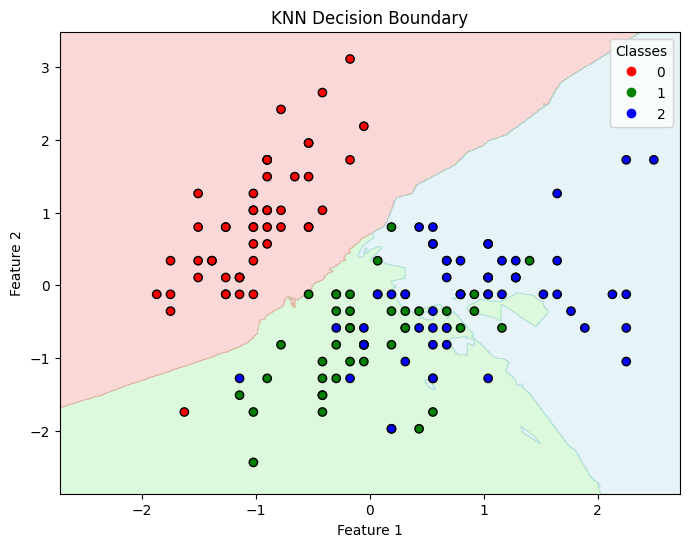

In [77]:
decision_boundary(x_vis_scaled, y_vis, knn_vis)
